In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df['target'] = iris.target
iris_df.sample(5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
60,5.0,2.0,3.5,1.0,1
19,5.1,3.8,1.5,0.3,0
120,6.9,3.2,5.7,2.3,2
99,5.7,2.8,4.1,1.3,1
82,5.8,2.7,3.9,1.2,1


In [3]:
print(f"Shape: {iris_df.shape[0]} rows × {iris_df.shape[1]} columns")
print('-'*84+'\n')
print(iris_df.info())
print('-'*84)
display(iris_df.describe())

Shape: 150 rows × 5 columns
------------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
------------------------------------------------------------------------------------


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
from sklearn.model_selection import train_test_split

X = iris_df.iloc[:,0:-1]
y = iris_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train:\n--> Shape: {X_train.shape[0]} rows × {X_train.shape[1]} columns")
print(f"X_test:\n--> Shape: {X_test.shape[0]} rows × {X_test.shape[1]} columns")
print(f"y_train:\n--> Shape: {y_train.shape}")
print(f"y_test:\n--> Shape: {y_test.shape}")

X_train:
--> Shape: 120 rows × 4 columns
X_test:
--> Shape: 30 rows × 4 columns
y_train:
--> Shape: (120,)
y_test:
--> Shape: (30,)


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

pipeline_steps = [
    ('scaler', StandardScaler()),  # Step 1: Feature scaling
    ('classifier', RandomForestClassifier(min_samples_leaf=5))  # Step 2: Classification mode
]

# Build pipeline
pipeline = Pipeline(pipeline_steps)

# Fit on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [6]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X, y, cv=5)
print("CV Accuracy:", scores)
print("Mean:", scores.mean(), "Std:", scores.std())

CV Accuracy: [0.93333333 0.96666667 0.93333333 0.96666667 1.        ]
Mean: 0.96 Std: 0.024944382578492935


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Define candidate models
models = {
    "LogReg": LogisticRegression(max_iter=200),
    "SVM": SVC(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", model)
    ])
    scores = cross_val_score(pipeline, X, y, cv=5)
    print(f"{name}: Mean={scores.mean():.2f}, Std={scores.std():.3f}")


LogReg: Mean=0.96, Std=0.039
SVM: Mean=0.97, Std=0.021
RandomForest: Mean=0.96, Std=0.025
KNN: Mean=0.96, Std=0.025


In [8]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", RandomForestClassifier(random_state=42))
])

param_grid = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [None, 5, 10],
    "classifier__min_samples_leaf": [1, 3, 5]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid.fit(X, y)

print("Best params:", grid.best_params_)
print("Best CV score:", round(grid.best_score_,2))


Best params: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 100}
Best CV score: 0.97


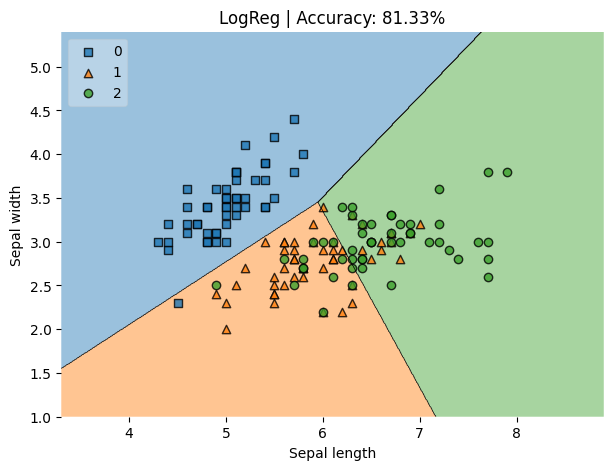

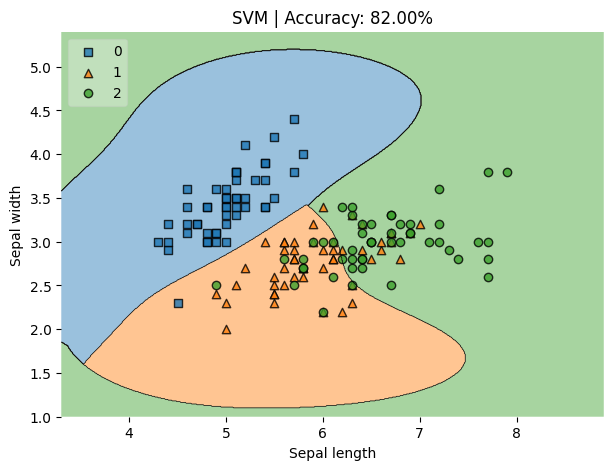

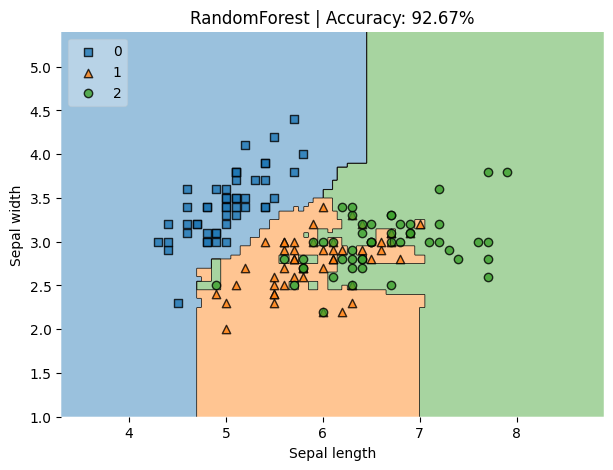

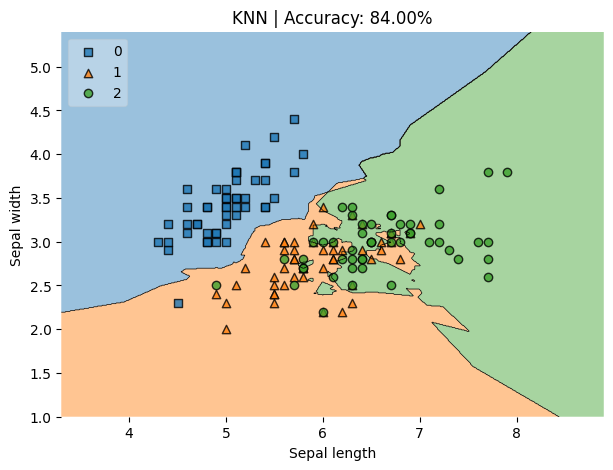

In [9]:
from mlxtend.plotting import plot_decision_regions

X = iris_df.iloc[:, [0, 1]].values  # sepal length and sepal width
y = iris_df.iloc[:, -1].values

models = {
    "LogReg": LogisticRegression(max_iter=200),
    "SVM": SVC(),
    "RandomForest": RandomForestClassifier(
        max_depth=10,
        min_samples_leaf=1,
        n_estimators=100
    ),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", model)
    ])
    pipeline.fit(X, y)

    # Calculate accuracy on training data
    acc = pipeline.score(X, y) * 100

    fig, ax = plt.subplots(figsize=(7, 5))
    plot_decision_regions(X, y, clf=pipeline, legend=2, ax=ax)

    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(f'{name} | Accuracy: {acc:.2f}%')
    plt.show()

## Testing my own custom decision regions plotting utility

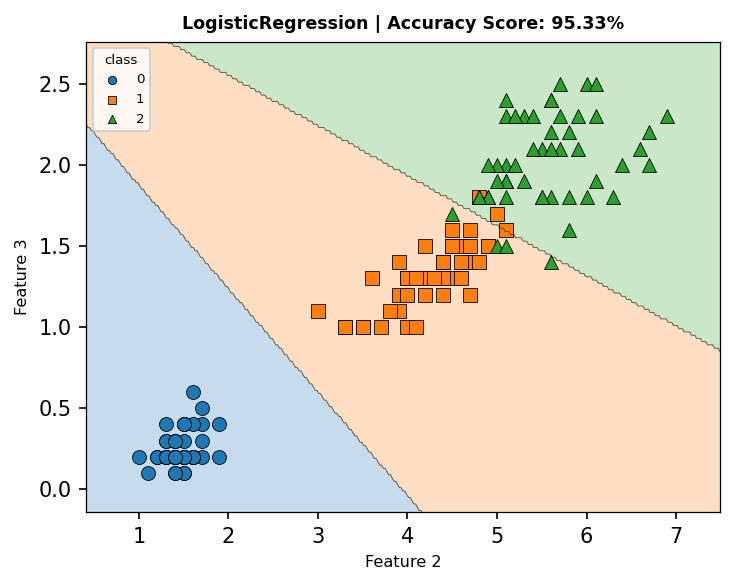

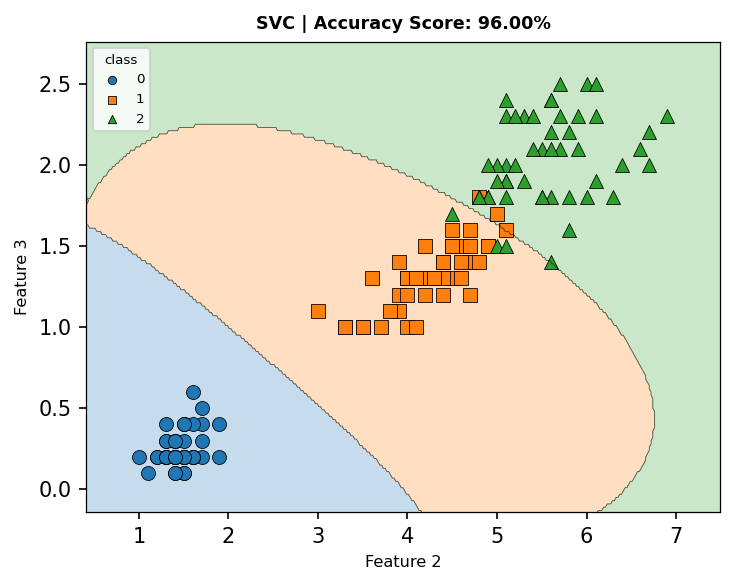

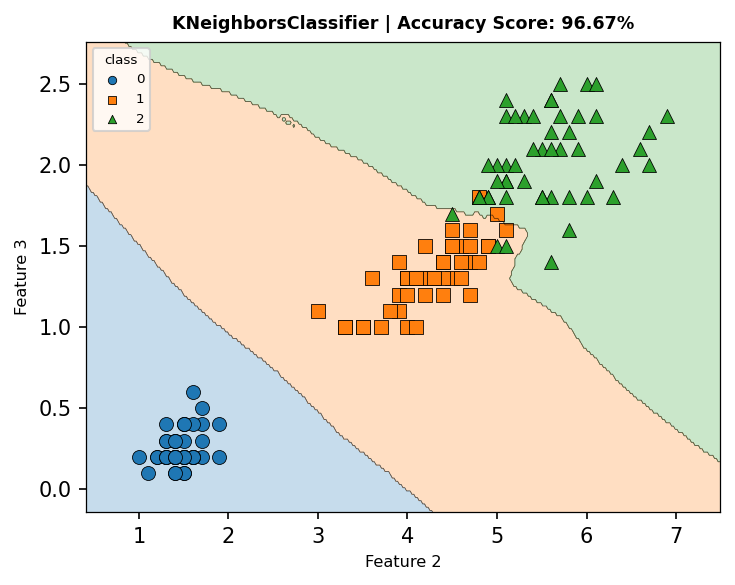

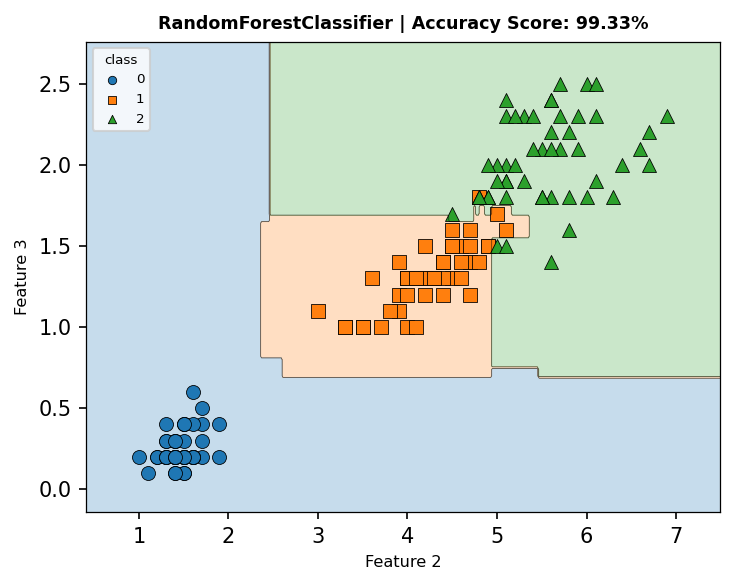

<Axes: title={'center': 'RandomForestClassifier | Accuracy Score: 99.33%'}, xlabel='Feature 2', ylabel='Feature 3'>

In [ ]:
# importing required libs again to run in one go

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from viz.decision_plot_beast import plot_decision_regions

X = iris_df.iloc[:, 0:-1]
y = iris_df.iloc[:, -1]

# 1) Logistic Regression
logreg_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=500))
])
plot_decision_regions(
    logreg_pipe, X, y,
    features=(2, 3),
    fit_on="full",   # or (X_train, y_train) if you want
    title_prefix="Logistic Regression (petal length vs width)",
    show_feature_names=False,
    figsize=(5,4)
)

# 2) SVM with RBF kernel
svm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="rbf", C=1.0, gamma="scale", probability=True))
])
plot_decision_regions(
    svm_pipe, X, y,
    features=(2, 3),
    fit_on="full",
    title_prefix="SVM RBF (petal length vs width)",
    show_feature_names=False,
    figsize=(5,4)
)

# 3) KNN
knn_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier(n_neighbors=5))
])
plot_decision_regions(
    knn_pipe, X, y,
    features=(2, 3),
    fit_on="full",
    title_prefix="KNN k=5 (petal length vs width)",
    show_feature_names=False,
    figsize=(5,4)
)

# 4) Random Forest
rf_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(n_estimators=200, random_state=42))
])
plot_decision_regions(
    rf_pipe, X, y,
    features=(2, 3),
    fit_on="full",
    title_prefix="Random Forest (petal length vs width)",
    show_feature_names=False,
    figsize=(5,4)
)


d:\Languages\Projects\ml-portfolio\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Languages\Projects\ml-portfolio\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Languages\Projects\ml-portfolio\.venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Languages\Projects\ml-portfolio\.venv\Lib\site-packages\skle

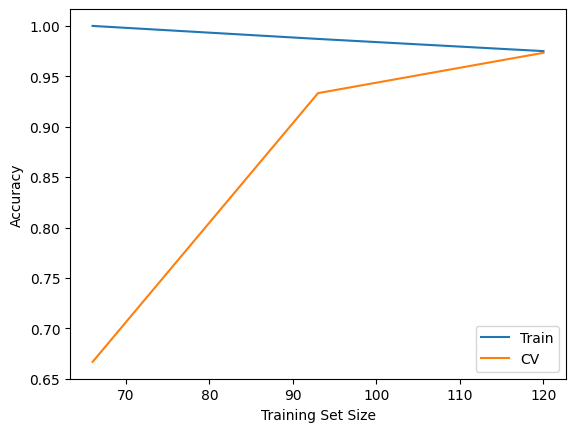

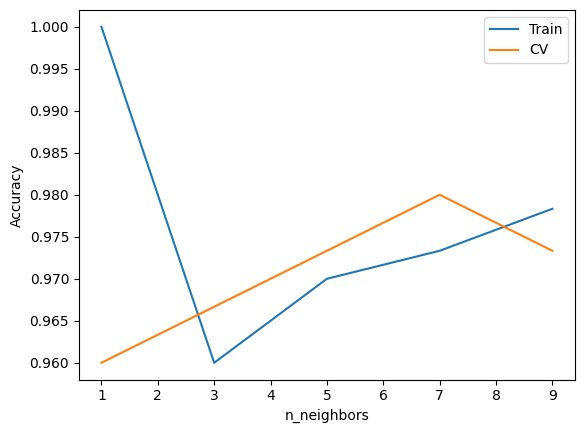

In [11]:
from sklearn.model_selection import learning_curve, validation_curve

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(max_iter=200),
    X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)
)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Train")
plt.plot(train_sizes, test_scores.mean(axis=1), label="CV")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Validation curve: vary hyperparameter
param_range = [1, 3, 5, 7, 9]
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(),
    X, y, param_name="n_neighbors", param_range=param_range, cv=5
)

plt.plot(param_range, train_scores.mean(axis=1), label="Train")
plt.plot(param_range, test_scores.mean(axis=1), label="CV")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
